In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# <h2> 1.	Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.</h2> 

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
type( iris )

sklearn.utils.Bunch

In [63]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# смотрим состав ключей
for key in iris.keys():
    print( key )

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [58]:
# смотрим состав полей за исключением даты
iris2 = {key:val for key,val in iris.items() if key != 'data'}
for key in iris2.keys():
    for values in iris2.values():
        print(key,values )

target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target None
target ['setosa' 'versicolor' 'virginica']
target .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean

In [6]:
# Смотрим на названия переменных
iris.feature_names
# Смотрим на данные, выводим 10 первых строк: 
iris.data[:10]
# Смотрим на целевую переменную:
iris.target_names
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from pandas import DataFrame
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
iris_frame=iris_frame.drop(columns='name', axis=1)
# удаляем 1 параметр из цели
iris_frame2=iris_frame[(iris_frame.target != 0)]

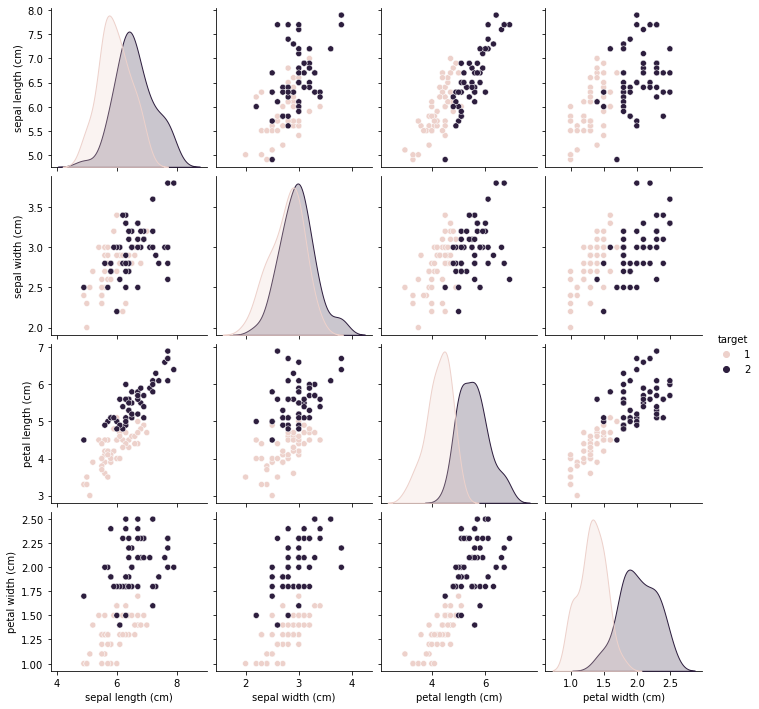

In [7]:
# строим график по 2 переменным
sns.pairplot(iris_frame2, hue="target")

# <h2>2.	Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.</h2>

In [18]:
# итоговый датасет
iris_frame2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


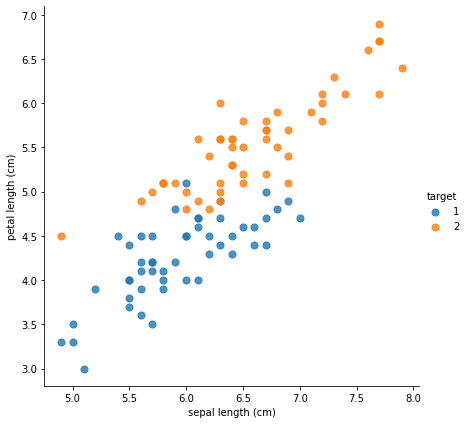

In [21]:
# визуализация данных
sns.lmplot('sepal length (cm)','petal length (cm)', hue='target', data=iris_frame2, size=6,fit_reg=False,scatter_kws={"s":50})
plt.show()

In [51]:
# для сравнения с моделью из библиотеки
from sklearn.linear_model import LogisticRegression

In [59]:
# Логистическая регрессия на Питон
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # модель для тренировки  
    def fit( self, X, Y ) :        
        # количество экземпляров, количества признаков (столбцов)       
        self.m, self.n = X.shape        
        # назначение весов        
        self.W = np.zeros( self.n ) # 0 вектор столбцов       
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # обучение градиентным спуском
                  
        for i in range( self.iterations ) :            
            self.update_weights() # запускаем обновление весов         
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # вычисление градиентов       
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # обновление весов    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Сигмоида для классификации 
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        return Z
        
    # массив предсказаний
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 ) 
        return Y
    
    # Функция потерь
    def loss( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 ) 
        Loss=  np.mean(-(Y*np.log(Z))- ((1-Y)*np.log(1-Z)))     
        return Loss

  

# <h2>3.	Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.</h2>

In [62]:
# функция для предсказаний
def main() :
      
    # разбиваем данные    
    df = iris_frame2
    X = df.iloc[:,:-1].values # без последней колонки
    Y = df.iloc[:,-1:].values

    # разбиваем на обучаемую и тестовые выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
    
    #print( Y_train)

    # Модель обучения (запуск класса)   
    model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
      
    model.fit( X_train, Y_train )    
    # Модель регрессии sklearn
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
 
    # Предсказания на тесте 2 моделей
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
    L1=model.loss( X_train )
      
    # результат предсказаний    
    Совпадения = 0    
    Совпадения1 = 0
      
    # счетчик    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            Совпадения = Совпадения + 1
          
        if Y_test[count] == Y_pred1[count] :            
            Совпадения1 = Совпадения1 + 1
              
        count = count + 1
          
    print( "Точность нашей модели       :  ", ( 
      Совпадения / count ) * 100 )
    print( "Точность модели sklearn   :  ", ( 
      Совпадения1 / count ) * 100 )
    print( "Размер ошибки   :  ", ( 
      L1 ) * 100 )

# запускаем функцию
if __name__ == "__main__" :     
    main()

Точность нашей модели       :   44.11764705882353
Точность модели sklearn   :   97.05882352941177
Размер ошибки   :   nan


# <h2>4.	Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).</h2>

<h2>5.	Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).</h2>

# <h2>6.	Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.</h2>